In [5]:
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress

In [6]:
mouse_metadata_path = "resources/Mouse_metadata.csv"
study_results_path = "resources/Study_results.csv"

In [7]:
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

In [8]:
file = study_results.loc[study_results.duplicated(["Mouse ID","Timepoint"])]

In [9]:
len(study_results)

1893

In [10]:
file.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
137,g989,0,45.000000,0
360,g989,5,47.570392,0
681,g989,10,49.880528,0
869,g989,15,53.442020,0
1111,g989,20,54.657650,1


In [11]:
index_names = study_results[study_results['Mouse ID'] == 'g989' ].index

In [12]:
study_results.drop(index_names, inplace = True)

In [13]:
len(study_results)

1880

In [14]:
len(mouse_metadata)

249

In [15]:
index_names = mouse_metadata.loc[mouse_metadata["Mouse ID"] == "g989"].index

In [16]:
mouse_metadata.drop(index_names, inplace = True)

In [17]:
len(mouse_metadata)

248

In [18]:
MouseTable = pd.merge(study_results,mouse_metadata, on = "Mouse ID", how = "outer")

In [19]:
MouseTable

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22
...,...,...,...,...,...,...,...,...
1875,m601,25,33.118756,1,Capomulin,Male,22,17
1876,m601,30,31.758275,1,Capomulin,Male,22,17
1877,m601,35,30.834357,1,Capomulin,Male,22,17
1878,m601,40,31.378045,1,Capomulin,Male,22,17


In [20]:
len(MouseTable)

1880

In [21]:
Res = MouseTable.groupby(["Drug Regimen"])[["Tumor Volume (mm3)"]].agg(["mean","median","var","std","sem"])

In [22]:
Res

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

In [23]:
CountbyRegimen = MouseTable.groupby(["Drug Regimen"])[["Timepoint"]].count()

In [24]:
CountbyRegimen

,Timepoint
Drug Regimen,
Capomulin,230
Ceftamin,178
Infubinol,178
Ketapril,188
Naftisol,186
Placebo,181
Propriva,148
Ramicane,228
Stelasyn,181


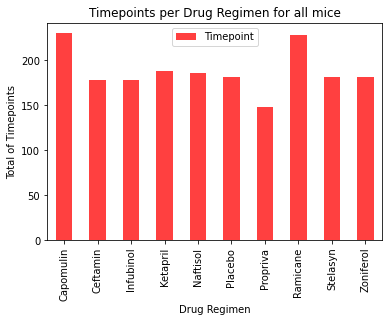

In [25]:
CountbyRegimen.plot(kind="bar", facecolor = "red", width = .5, alpha=0.75, align="center", title = "Timepoints per Drug Regimen for all mice", ylabel="Total of Timepoints")     
plt.show()

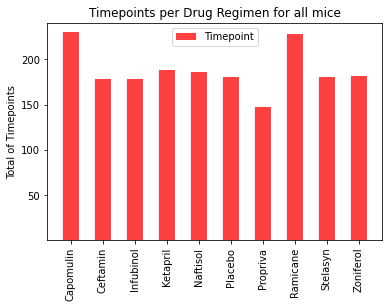

In [26]:
CountbyRegimen = CountbyRegimen.reset_index()
plt.bar(CountbyRegimen["Drug Regimen"], CountbyRegimen["Timepoint"],facecolor="red", alpha=0.75, align="center", width = .5, label = "Timepoint")

plt.xticks(CountbyRegimen["Drug Regimen"], CountbyRegimen["Drug Regimen"], rotation="vertical")
plt.ylabel ("Total of Timepoints")
plt.title("Timepoints per Drug Regimen for all mice")
plt.ylim(0.5, max(CountbyRegimen["Timepoint"])+10)      
plt.legend(loc = "upper center")
plt.show()

In [27]:
#This graph shows total number of timepoints for all mice tested for each drug regimen
#and we can see how these two drug regimens, Capomulin and Ramicane, have more samples than the rest of the drugs, being Capomulin the one with the max number of timepoints.

In [28]:
MF = MouseTable.groupby(["Sex"]).count()

In [29]:
MF

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Age_months,Weight (g)
Sex,,,,,,,
Female,922,922,922,922,922,922,922
Male,958,958,958,958,958,958,958


In [30]:
MF = MF.rename(columns={"Mouse ID" : "Total"})

In [31]:
MF = MF.reset_index()

In [32]:
MF = MF[["Sex","Total"]]

In [33]:
MF

,Sex,Total
0,Female,922
1,Male,958


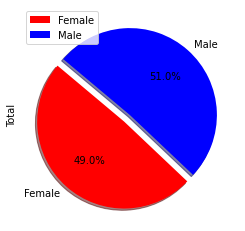

In [34]:
labels = MF["Sex"]
sizes = MF["Total"]
colors = ["red","blue"]
explode = (0.1, 0)
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.legend(loc='upper left')
plt.ylabel( "Total")
plt.show()

In [35]:
MF= MF.set_index(MF["Sex"])
MF = MF["Total"]

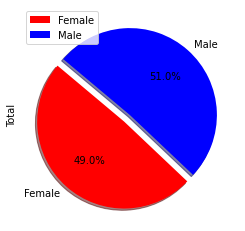

In [36]:
ax = MF.plot(kind="pie", subplots = True, explode=explode, labels=labels, colors=colors,autopct="%1.1f%%", shadow=True, startangle=140)
plt.legend(loc='upper left')
plt.show()

In [37]:
#This pie chart shows how the distribution of females and Males are almost the same in this study. Only 2% more are Males.

In [38]:
MouseTable

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22
...,...,...,...,...,...,...,...,...
1875,m601,25,33.118756,1,Capomulin,Male,22,17
1876,m601,30,31.758275,1,Capomulin,Male,22,17
1877,m601,35,30.834357,1,Capomulin,Male,22,17
1878,m601,40,31.378045,1,Capomulin,Male,22,17


In [39]:
SelectedDrugReg = MouseTable.loc[(MouseTable["Drug Regimen"] == "Capomulin") | (MouseTable["Drug Regimen"] == "Ramicane") | (MouseTable["Drug Regimen"] == "Ceftamin") | (MouseTable["Drug Regimen"] == "Infubinol")]

In [40]:
Lastvol = SelectedDrugReg.groupby("Mouse ID")["Timepoint"].max()

In [41]:
Lastvol.reset_index()

,Mouse ID,Timepoint
0,a203,45
1,a251,45
2,a275,45
3,a411,45
4,a444,45
...,...,...
95,y769,45
96,y793,45
97,y865,45
98,z578,45


In [42]:
len(Lastvol)

100

In [43]:
Lastvol = pd.merge(Lastvol, SelectedDrugReg, on = ["Mouse ID", "Timepoint"], how = "inner")

In [44]:
Lastvol.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a275,45,62.999356,3,Ceftamin,Female,20,28
3,a411,45,38.407618,1,Ramicane,Male,3,22
4,a444,45,43.047543,0,Ramicane,Female,10,25


In [45]:
#Lastvol is the table that contains the final tumor volume per mouse with the most prominent Drug Reg.

In [46]:
len(Lastvol)

100

In [47]:
Lastvol

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a275,45,62.999356,3,Ceftamin,Female,20,28
3,a411,45,38.407618,1,Ramicane,Male,3,22
4,a444,45,43.047543,0,Ramicane,Female,10,25
...,...,...,...,...,...,...,...,...
95,y769,45,68.594745,4,Ceftamin,Female,6,27
96,y793,45,31.896238,2,Capomulin,Male,17,17
97,y865,45,64.729837,3,Ceftamin,Male,23,26
98,z578,45,30.638696,0,Ramicane,Male,11,16


In [48]:
Capomulin = Lastvol.loc[(Lastvol["Drug Regimen"] == "Capomulin")]
Infubinol = Lastvol.loc[(Lastvol["Drug Regimen"] == "Infubinol")]
Ceftamin  = Lastvol.loc[(Lastvol["Drug Regimen"] == "Ceftamin")]
Ramicane  = Lastvol.loc[(Lastvol["Drug Regimen"] == "Ramicane")]


In [49]:
CapomulinC = Capomulin["Tumor Volume (mm3)"]
InfubinolC = Infubinol["Tumor Volume (mm3)"]
CeftaminC = Ceftamin["Tumor Volume (mm3)"]
RamicaneC = Ramicane["Tumor Volume (mm3)"]
Drugs = [CapomulinC,InfubinolC,CeftaminC,RamicaneC]

In [50]:
len(Capomulin)

25

In [51]:
len(Infubinol)

25

In [52]:
len(Ceftamin)

25

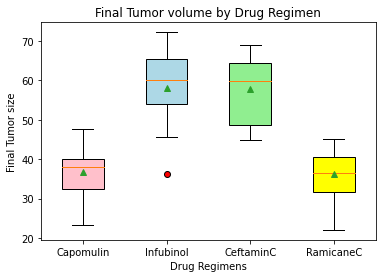

In [53]:
fig1, ax1 = plt.subplots()
boxpro1 = dict(facecolor = 'pink', color = 'black')
boxpro2 = dict(facecolor = 'lightblue', color = 'black')
boxpro3 = dict(facecolor = 'lightgreen', color = 'black')
boxpro4 = dict(facecolor = 'yellow', color = 'black')
green_diamond = dict(markerfacecolor='g', marker='D')
red_o = dict(markerfacecolor='r', marker='o')
yellow_diamond = dict(markerfacecolor='yellow', marker='D')
blue_o = dict(markerfacecolor='blue', marker='o')
labels = ['Capomulin','Infubinol','CeftaminC','RamicaneC']

ax1.boxplot(Drugs[0], widths = .5, positions=[1],labels = [labels[0]],vert=True, 
                  showmeans= True, patch_artist=True,flierprops = green_diamond, boxprops = boxpro1 )
ax1.boxplot(Drugs[1],widths = .5,positions=[2],labels = [labels[1]],vert=True, 
                  showmeans= True,patch_artist=True,flierprops = red_o, boxprops = boxpro2)
ax1.boxplot(Drugs[2],widths = .5,positions=[3],labels = [labels[2]],vert=True, 
                  showmeans= True,patch_artist=True,flierprops = yellow_diamond,boxprops = boxpro3)
ax1.boxplot(Drugs[3],widths = .5,positions=[4],labels = [labels[3]],vert=True, 
                  showmeans= True,patch_artist=True,flierprops = blue_o,boxprops = boxpro4)
ax1.set_title("Final Tumor volume by Drug Regimen")
ax1.set_xlabel('Drug Regimens')
ax1.set_ylabel('Final Tumor size')
plt.show()

In [54]:
#Capomulin and Ramicaine show smaller Tumor sizes than the other two Regimens at the final tummor size 
#througout the study, also Only Infubinol show's an 
#outlier which means only one mouse is out of the range of it's wiskers. Out of range of study.
#Also Ramicane seems to have a lower tumor size showed in the median and it's average( mean).
#Capomulin has its median closer to its upper quartile.

In [55]:
quadriles = CapomulinC.quantile([.25,.5,.75])
lowerq = quadriles[.25]
upperq = quadriles[.75]
iqr = upperq - lowerq
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"values below than {lower_bound} could be outliers for Capomulin.")
print(f"values higher than {upper_bound} could be outliers for Capomulin.")
print (f"the median quartile is {quadriles[.5]}")

values below than 20.70456164999999 could be outliers for Capomulin.
values higher than 51.83201549 could be outliers for Capomulin.
the median quartile is 38.1251644


In [56]:
Outliers = Capomulin.loc[(Capomulin["Tumor Volume (mm3)"] < lower_bound) | (Capomulin["Tumor Volume (mm3)"] > upper_bound)]

In [57]:
Outliers

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)


In [58]:
quadriles = InfubinolC.quantile([.25,.5,.75])
lowerq = quadriles[.25]
upperq = quadriles[.75]
iqr = upperq - lowerq
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"values below than {lower_bound} could be outliers for Infubinol.")
print(f"values higher than {upper_bound} could be outliers for Infubinol.")
print (f"the median quartile is {quadriles[.5]}")

values below than 36.83290494999999 could be outliers for Infubinol.
values higher than 82.74144559000001 could be outliers for Infubinol.
the median quartile is 60.16518046


In [59]:
Outliers = Infubinol.loc[(Infubinol["Tumor Volume (mm3)"] < lower_bound) | (Infubinol["Tumor Volume (mm3)"] > upper_bound)]

In [60]:
Outliers

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
15,c326,5,36.321346,0,Infubinol,Female,18,25


In [61]:
quadriles = CeftaminC.quantile([.25,.5,.75])
lowerq = quadriles[.25]
upperq = quadriles[.75]
iqr = upperq - lowerq
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"values below than {lower_bound} could be outliers for Ceftamin.")
print(f"values higher than {upper_bound} could be outliers for Ceftamin.")
print (f"the median quartile is {quadriles[.5]}")

values below than 25.355449580000002 could be outliers for Ceftamin.
values higher than 87.66645829999999 could be outliers for Ceftamin.
the median quartile is 59.85195552


In [62]:
Outliers = Ceftamin.loc[(Ceftamin["Tumor Volume (mm3)"] < lower_bound) | (Ceftamin["Tumor Volume (mm3)"] > upper_bound)]

In [63]:
Outliers

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)


In [64]:
quadriles = RamicaneC.quantile([.25,.5,.75])
lowerq = quadriles[.25]
upperq = quadriles[.75]
iqr = upperq - lowerq
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"values below than {lower_bound} could be outliers for Ramicane.")
print(f"values higher than {upper_bound} could be outliers for Ramicane.")
print (f"the median quartile is {quadriles[.5]}")

values below than 17.912664470000003 could be outliers for Ramicane.
values higher than 54.30681135 could be outliers for Ramicane.
the median quartile is 36.56165229


In [65]:
Outliers = Ramicane.loc[(Ramicane["Tumor Volume (mm3)"] < lower_bound) | (Ramicane["Tumor Volume (mm3)"] > upper_bound)]

In [66]:
Outliers

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)


In [67]:
OneMouse = MouseTable.loc[(MouseTable["Mouse ID"] == "b128") ]

In [68]:
OneMouse

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22
5,b128,25,43.262145,1,Capomulin,Female,9,22
6,b128,30,40.605335,1,Capomulin,Female,9,22
7,b128,35,37.967644,1,Capomulin,Female,9,22
8,b128,40,38.379726,2,Capomulin,Female,9,22
9,b128,45,38.982878,2,Capomulin,Female,9,22


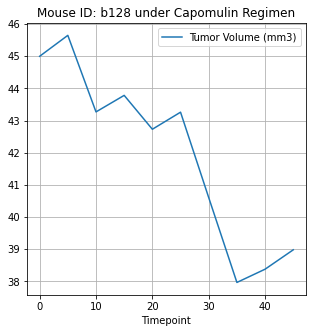

In [69]:
OneMouse.plot(kind="line", x="Timepoint", y="Tumor Volume (mm3)", grid=True, figsize=(5,5),
              title="Mouse ID: b128 under Capomulin Regimen")
plt.show()

In [70]:
#This Regimen seems to be prominent because there is a decline in the size of the tummor over the period of time of the study.

In [71]:
CapomulinAvg = MouseTable.loc[(MouseTable["Drug Regimen"] == "Capomulin") ]

In [72]:
CapomulinAvg = CapomulinAvg.groupby(["Mouse ID"])[["Weight (g)","Tumor Volume (mm3)"]].mean()

In [73]:
CapomulinAvg.reset_index()

,Mouse ID,Weight (g),Tumor Volume (mm3)
0,b128,22,41.963636
1,b742,21,40.083699
2,f966,17,36.505973
3,g288,19,41.990097
4,g316,22,44.613344
5,i557,24,44.805810
6,i738,20,39.141053
7,j119,23,44.465236
8,j246,21,43.216925
9,l509,21,44.434474


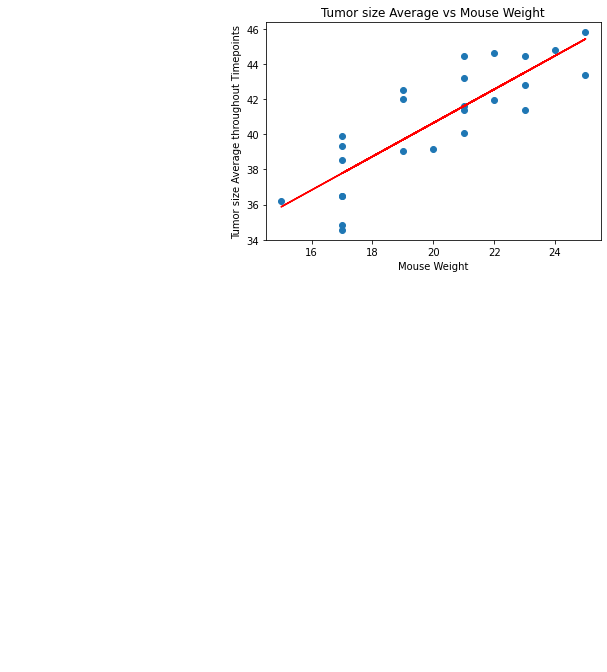

In [74]:
x_values = CapomulinAvg['Weight (g)']
y_values = CapomulinAvg['Tumor Volume (mm3)']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.title("Tumor size Average vs Mouse Weight")
plt.xlabel('Mouse Weight')
plt.ylabel('Tumor size Average throughout Timepoints')
plt.show()

In [75]:
print(f"The correlation coefficient between Weight and Tumor average is {round(st.pearsonr(x_values, y_values)[0],2)}")

The correlation coefficient between Weight and Tumor average is 0.84
